# Phishing Website Detection by Machine Learning Techniques

In [52]:
!pip install -U scikit-learn
# Imports
!matplotlib inline
!pip install pandas


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
/bin/bash: matplotlib: command not found

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


In [53]:
import pandas as pd

In [54]:
import pandas as pd

# Load the malicious URLs
malicious_df = pd.read_csv('verified_online.csv')
# Assuming 'url' column contains the URLs

# Load the benign URLs
# Assuming 'top-1m.csv' has URLs in a specific column, adjust the column index/name accordingly
benign_df = pd.read_csv('top-1m.csv', header=None, names=['rank', 'url'])


In [55]:
malicious_df

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,8443292,https://client-allegro.earchiwum.pl/doc/95ac87...,http://www.phishtank.com/phish_detail.php?phis...,2024-02-06T12:10:01+00:00,yes,2024-02-06T12:12:58+00:00,yes,Allegro
1,8443283,https://ocbcc-sg-bankiingsg.com/x/,http://www.phishtank.com/phish_detail.php?phis...,2024-02-06T11:51:07+00:00,yes,2024-02-06T11:52:38+00:00,yes,Other
2,8443257,https://bnpparibasn.eu/,http://www.phishtank.com/phish_detail.php?phis...,2024-02-06T11:10:16+00:00,yes,2024-02-06T11:12:56+00:00,yes,Other
3,8443256,https://bnpparibasn.eu:443/,http://www.phishtank.com/phish_detail.php?phis...,2024-02-06T11:10:11+00:00,yes,2024-02-06T11:12:56+00:00,yes,Other
4,8443255,http://bnpparibasn.eu/,http://www.phishtank.com/phish_detail.php?phis...,2024-02-06T11:10:10+00:00,yes,2024-02-06T11:12:56+00:00,yes,Other
...,...,...,...,...,...,...,...,...
45563,3573703,http://www.ezblox.site/free/jennifer111/helpdesk,http://www.phishtank.com/phish_detail.php?phis...,2015-11-03T14:41:38+00:00,yes,2016-03-15T18:51:08+00:00,yes,Other
45564,2042606,http://www.formbuddy.com/cgi-bin/formdisp.pl?u...,http://www.phishtank.com/phish_detail.php?phis...,2013-09-30T13:24:39+00:00,yes,2013-10-01T13:33:17+00:00,yes,Other
45565,1865971,http://www.formbuddy.com/cgi-bin/formdisp.pl?u...,http://www.phishtank.com/phish_detail.php?phis...,2013-05-28T15:59:31+00:00,yes,2013-05-28T22:13:12+00:00,yes,Other
45566,1460953,http://www.habbocreditosparati.blogspot.com/,http://www.phishtank.com/phish_detail.php?phis...,2012-06-14T15:19:26+00:00,yes,2012-06-14T15:29:11+00:00,yes,Sulake Corporation


In [56]:
# Extract the scheme (e.g., http, https, ftp) from each URL
malicious_df['scheme'] = malicious_df['url'].str.extract(r'^(.*?)://')

# Find unique schemes in the 'scheme' column
unique_schemes = malicious_df['scheme'].unique()

# Display the unique schemes
unique_schemes

array(['https', 'http'], dtype=object)

In [57]:
# Replace 'http://' with an empty string
malicious_df['url'] = malicious_df['url'].str.replace('http://', '', regex=False)

# Similarly, replace 'https://' with an empty string
malicious_df['url'] = malicious_df['url'].str.replace('https://', '', regex=False)

In [47]:
malicious_df

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target,label,scheme
0,8443292,client-allegro.earchiwum.pl/doc/95ac87ff753e96...,http://www.phishtank.com/phish_detail.php?phis...,2024-02-06T12:10:01+00:00,yes,2024-02-06T12:12:58+00:00,yes,Allegro,1,https
1,8443283,ocbcc-sg-bankiingsg.com/x/,http://www.phishtank.com/phish_detail.php?phis...,2024-02-06T11:51:07+00:00,yes,2024-02-06T11:52:38+00:00,yes,Other,1,https
2,8443257,bnpparibasn.eu/,http://www.phishtank.com/phish_detail.php?phis...,2024-02-06T11:10:16+00:00,yes,2024-02-06T11:12:56+00:00,yes,Other,1,https
3,8443256,bnpparibasn.eu:443/,http://www.phishtank.com/phish_detail.php?phis...,2024-02-06T11:10:11+00:00,yes,2024-02-06T11:12:56+00:00,yes,Other,1,https
4,8443255,bnpparibasn.eu/,http://www.phishtank.com/phish_detail.php?phis...,2024-02-06T11:10:10+00:00,yes,2024-02-06T11:12:56+00:00,yes,Other,1,http
...,...,...,...,...,...,...,...,...,...,...
45563,3573703,www.ezblox.site/free/jennifer111/helpdesk,http://www.phishtank.com/phish_detail.php?phis...,2015-11-03T14:41:38+00:00,yes,2016-03-15T18:51:08+00:00,yes,Other,1,http
45564,2042606,www.formbuddy.com/cgi-bin/formdisp.pl?u=Twice&...,http://www.phishtank.com/phish_detail.php?phis...,2013-09-30T13:24:39+00:00,yes,2013-10-01T13:33:17+00:00,yes,Other,1,http
45565,1865971,www.formbuddy.com/cgi-bin/formdisp.pl?u=securi...,http://www.phishtank.com/phish_detail.php?phis...,2013-05-28T15:59:31+00:00,yes,2013-05-28T22:13:12+00:00,yes,Other,1,http
45566,1460953,www.habbocreditosparati.blogspot.com/,http://www.phishtank.com/phish_detail.php?phis...,2012-06-14T15:19:26+00:00,yes,2012-06-14T15:29:11+00:00,yes,Sulake Corporation,1,http


In [58]:
missing_proportion = malicious_df.apply(lambda x: sum(x.isna()) / len(malicious_df))
missing_proportion

phish_id             0.0
url                  0.0
phish_detail_url     0.0
submission_time      0.0
verified             0.0
verification_time    0.0
online               0.0
target               0.0
scheme               0.0
dtype: float64

In [60]:
benign_df

,rank,url
0,1,google.com
1,2,youtube.com
2,3,facebook.com
3,4,baidu.com
4,5,wikipedia.org
...,...,...
999995,999996,sibf.org
999996,999997,bukapintu.co
999997,999998,klatovynet.cz
999998,999999,elconquistadorfm.cl


In [61]:
#to balance the data
benign_df= benign_df.loc[range(0,50000)]

In [62]:
benign_df

,rank,url
0,1,google.com
1,2,youtube.com
2,3,facebook.com
3,4,baidu.com
4,5,wikipedia.org
...,...,...
49995,49996,agl.com.au
49996,49997,hdgayporno.com
49997,49998,selfhacked.com
49998,49999,quartier-rouge.be


In [63]:
# Extract the scheme (e.g., http, https, ftp) from each URL
benign_df['scheme'] = benign_df['url'].str.extract(r'^(.*?)://')

# Find unique schemes in the 'scheme' column
unique_schemes = benign_df['scheme'].unique()

# Display the unique schemes
unique_schemes

array([nan], dtype=object)

In [64]:
missing_proportion = benign_df.apply(lambda x: sum(x.isna()) / len(benign_df))
missing_proportion

rank      0.0
url       0.0
scheme    1.0
dtype: float64

In [65]:
malicious_df['label'] = 1  # Label malicious URLs as 1
benign_df['label'] = 0  # Label benign URLs as 0

In [66]:
combined_df = pd.concat([malicious_df[['url', 'label']], benign_df[['url', 'label']]], ignore_index=True)


In [38]:
combined_df.head(30)

,url,label
0,https://client-allegro.earchiwum.pl/doc/95ac87...,1
1,https://ocbcc-sg-bankiingsg.com/x/,1
2,https://bnpparibasn.eu/,1
3,https://bnpparibasn.eu:443/,1
4,http://bnpparibasn.eu/,1
5,https://servicepflege-kontoaktualisieren383266...,1
6,http://servicepflege-kontoaktualisieren383266....,1
7,https://docs.google.com/presentation/d/e/2PACX...,1
8,http://tinyurl.com/3j5f7tdu,1
9,https://webde-102409.weeblysite.com/,1


In [68]:
# Replace 'http://' with an empty string
combined_df['url'] = combined_df['url'].str.replace('http://', '', regex=False)

# Similarly, replace 'https://' with an empty string
combined_df['url'] = combined_df['url'].str.replace('https://', '', regex=False)

In [69]:
combined_df

,url,label
0,client-allegro.earchiwum.pl/doc/95ac87ff753e96...,1
1,ocbcc-sg-bankiingsg.com/x/,1
2,bnpparibasn.eu/,1
3,bnpparibasn.eu:443/,1
4,bnpparibasn.eu/,1
...,...,...
95563,agl.com.au,0
95564,hdgayporno.com,0
95565,selfhacked.com,0
95566,quartier-rouge.be,0


label
0    50000
1    45568
Name: count, dtype: int64


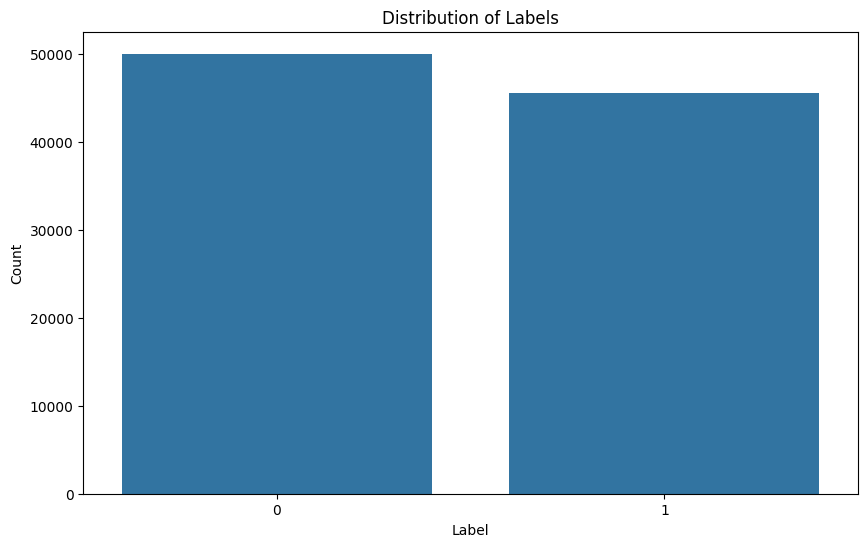

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

label_counts = combined_df['label'].value_counts()
print(label_counts)

# Plotting the distribution of labels
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=combined_df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()